<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 7.1.2: Random Forests

INSTRUCTIONS:

- Read the guides and hints, then create the necessary analysis and code for the scenario below.
- The baseline results (minimum) are:
    - **Accuracy** = 0.7419
    - **ROC AUC**  = 0.6150
- Try to achieve better results!

# Foreword
It is common that companies and professionals start with the data immediately available. Although this approach works, ideally the first step is to identify the problem or question and only then identify and obtain the set of data that can help to solve or answer the problem.

Also, given the current abundance of data, processing power and some particular machine learning methods, there could be a temptation to use ALL the data available. **Quality** is _**better**_ then **Quantity**!

Part of calling this discipline **Data Science** is that it is supposed to follow a process and not reach conclusions without support from evidence.

Moreover, it is a creative, exploratory and interactive processes. It is part of the process to repeat, review and change when finding a dead-end.

# Step 1: Define the problem or question
Identify the subject matter and the given or obvious questions that would be relevant in the field.

## Potential Questions
List the given or obvious questions.

## Actual Question
Choose the **one** question that should be answered.

# Step 2: Find the Data
### Blood Transfusion Service Center DataSet
- **Abstract**: Data taken from the **Blood Transfusion Service Center** in Hsin-Chu City in Taiwan.
- Date Donated: 2008-10-03
- Source:
        Original Owner and Donor: Prof. I-Cheng Yeh 
        Department of Information Management 
        Chung-Hua University, 
        Hsin Chu, Taiwan 30067, R.O.C. 

- Citation Request:
    **NOTE**: Reuse of this database is unlimited with retention of copyright notice for Prof. I-Cheng Yeh and the following published paper: 

        Yeh, I-Cheng, Yang, King-Jang, and Ting, Tao-Ming, "Knowledge discovery on RFM model using Bernoulli sequence, "Expert Systems with Applications, 2008
        
### UCI - Machine Learning Repository
- Center for Machine Learning and Intelligent Systems

The [**UCI Machine Learning Repository**](http://archive.ics.uci.edu/ml/about.html) is a collection of databases, domain theories, and data generators that are used by the machine learning community for the empirical analysis of machine learning algorithms.

In [1]:
# Find the dataset described above 
# Hint: search for it through the UCI Machine Learning Repository

# Step 3: Read the Data
- Read the data
- Perform some basic structural cleaning to facilitate the work

In [2]:
# Import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.under_sampling import RandomUnderSampler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

In [3]:
# Read data in pandas
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data"
df = pd.read_csv(url)

# Check data has loaded correctly
df.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


# Step 4: Explore and Clean the Data
- Perform some initial simple **EDA** (Exploratory Data Analysis)
- Check for
    - **Number of features**
    - **Data types**
    - **Domains, Intervals**
    - **Outliers** (are they valid or spurious data [read or measure errors])
    - **Null** (values not present or coded [as zero of empty strings])
    - **Missing Values** (coded [as zero of empty strings] or values not present)
    - **Coded content** (classes identified by numbers or codes to represent the absence of data)

In [4]:
# Perform EDA by investigating each of the points above 

In [4]:
# Check for nulls and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
 #   Column                                      Non-Null Count  Dtype
---  ------                                      --------------  -----
 0   Recency (months)                            748 non-null    int64
 1   Frequency (times)                           748 non-null    int64
 2   Monetary (c.c. blood)                       748 non-null    int64
 3   Time (months)                               748 non-null    int64
 4   whether he/she donated blood in March 2007  748 non-null    int64
dtypes: int64(5)
memory usage: 29.3 KB


4 features

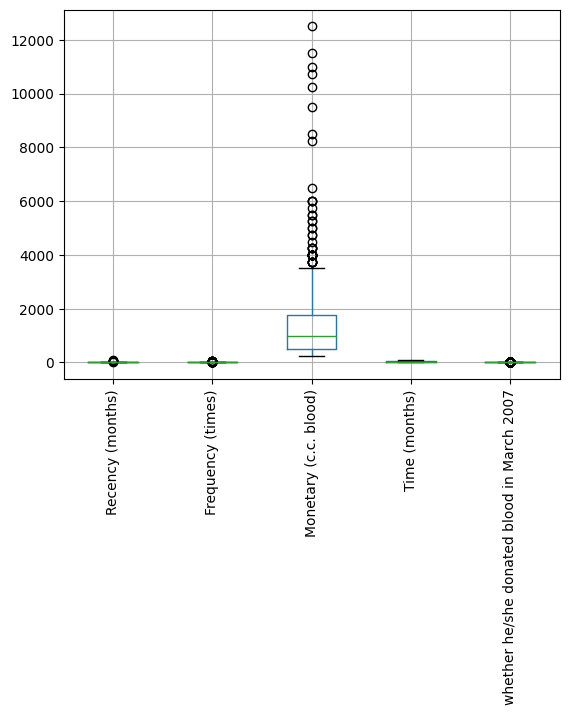

In [5]:
# Check for outliers

df.boxplot()
plt.xticks(rotation=90)
plt.show()

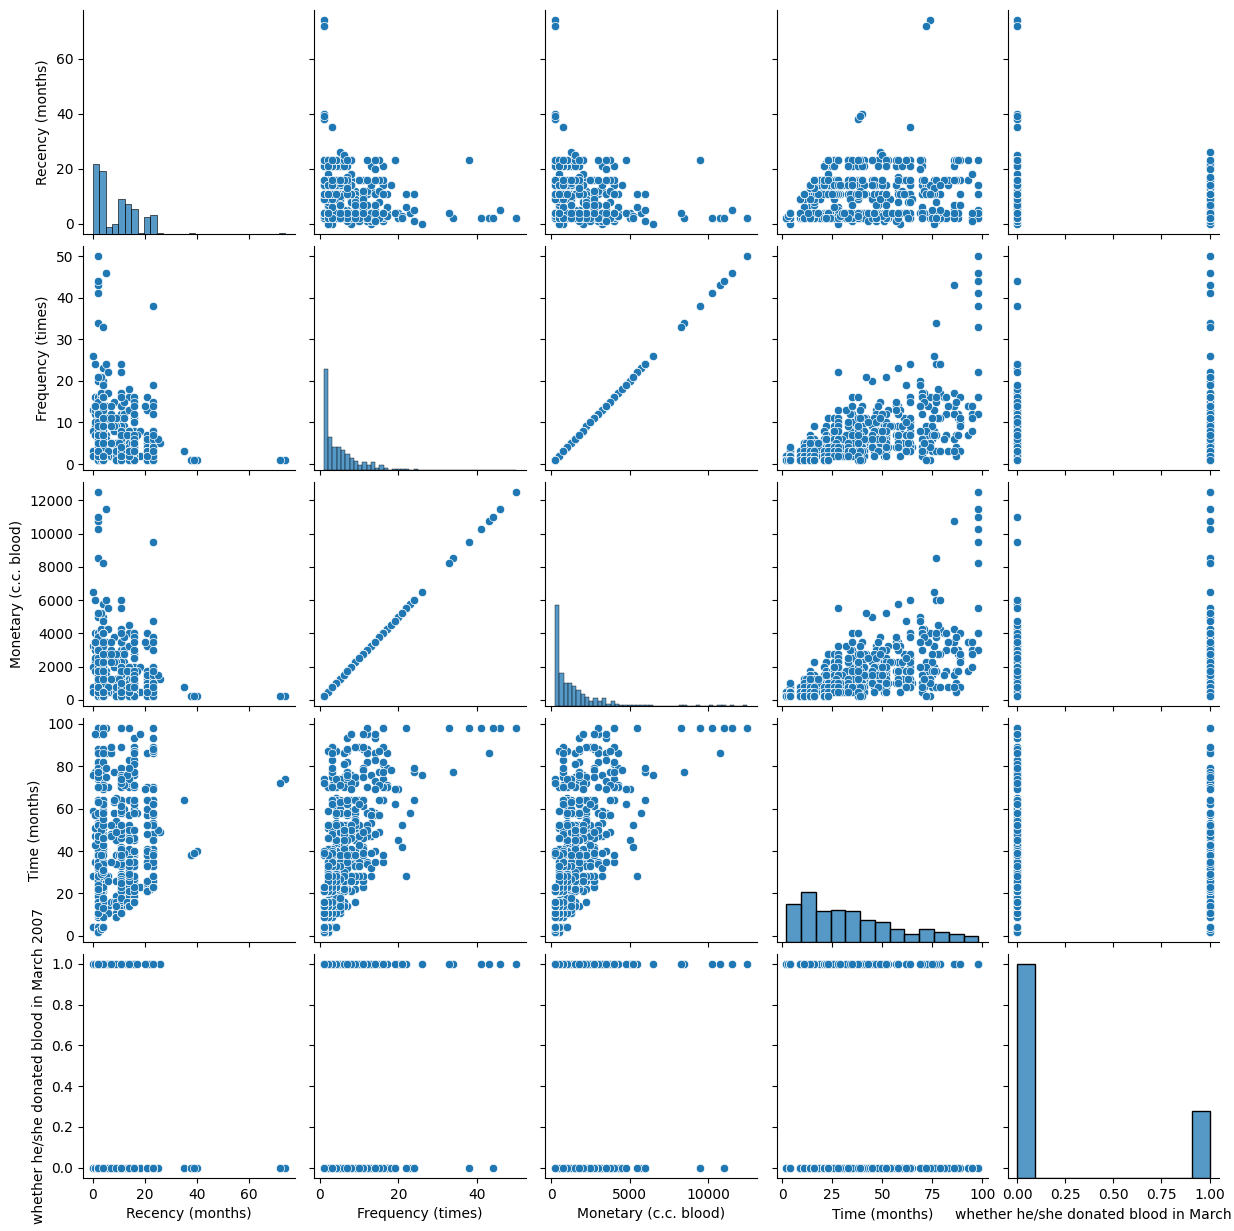

In [6]:
## Visualise the data points

# visualise features in pairs
sns.pairplot(df)
plt.show()

# Step 5: Prepare the Data
- Deal with the data as required by the modelling technique
    - **Outliers** (remove or adjust if possible or necessary)
    - **Null** (remove or interpolate if possible or necessary)
    - **Missing Values** (remove or interpolate if possible or necessary)
    - **Coded content** (transform if possible or necessary [str to number or vice-versa])
    - **Normalisation** (if possible or necessary)
    - **Feature Engineer** (if useful or necessary)

In [7]:
# Filter/subset/clean the data according to your EDA findings

In [7]:
# Normalize data
scaler = MinMaxScaler()
df_normalized = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_normalized

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,0.027027,1.000000,1.000000,1.000000,1.0
1,0.000000,0.244898,0.244898,0.270833,1.0
2,0.013514,0.306122,0.306122,0.343750,1.0
3,0.027027,0.387755,0.387755,0.447917,1.0
4,0.013514,0.469388,0.469388,0.781250,0.0
...,...,...,...,...,...
743,0.310811,0.020408,0.020408,0.375000,0.0
744,0.283784,0.020408,0.020408,0.520833,0.0
745,0.310811,0.040816,0.040816,0.625000,0.0
746,0.527027,0.000000,0.000000,0.385417,0.0


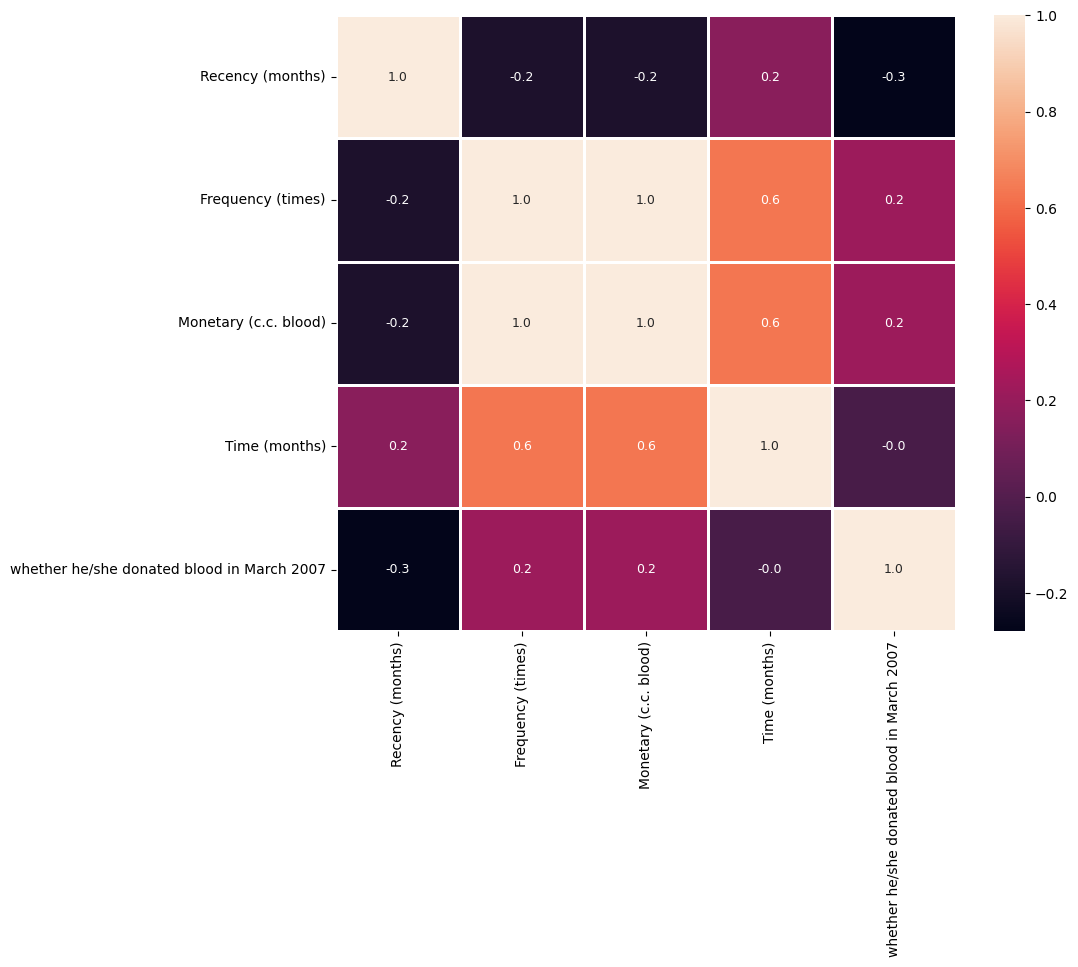

In [8]:
# Correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True),annot=True,fmt=".1f",annot_kws={"fontsize": 9},linewidths=1)
plt.show()

# Step 6: Modelling
Refer to the Problem and Main Question.
- What are the input variables (features)?
- Is there an output variable (label)?
- If there is an output variable:
    - What is it?
    - What is its type?
- What type of Modelling is it?
    - [ ] Supervised
    - [ ] Unsupervised 
- What type of Modelling is it?
    - [ ] Regression
    - [ ] Classification (binary) 
    - [ ] Classification (multi-class)
    - [ ] Clustering

The features are: **Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)**

The label for this data set is **whether he/she donated blood in March 2007**

After scaling, the label is binary.

Because we have a defined label, this is a supervised model.

Because the label output is binary, the modelling would be a binary classification model

# Step 7: Split the Data

Need to check for **Supervised** modelling:
- Number of known cases or observations
- Define the split in Training/Test or Training/Validation/Test and their proportions
- Check for unbalanced classes and how to keep or avoid it when splitting

In [9]:
# Define Target, Predictors
X = df.drop(columns=['whether he/she donated blood in March 2007'])
y = df['whether he/she donated blood in March 2007']

In [10]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=100666001, stratify = y)

In [11]:
# Check for imbalanced target data
y.value_counts()

0    570
1    178
Name: whether he/she donated blood in March 2007, dtype: int64

In [15]:
# Apply Random Under-Sampling to the training data only
rus = RandomUnderSampler(random_state=100666001)
X_res, y_res = rus.fit_resample(X_train, y_train)

# Step 8: Define a Model

Define the model and its hyper-parameters.

Consider the parameters and hyper-parameters of each model at each (re)run and after checking the efficiency of a model against the training and test datasets.

In [21]:
# Define and initialize the model
model = RandomForestClassifier(random_state=100666001)

# Step 9: Fit the Model

In [22]:
# Fit model
model.fit(X_res, y_res)

RandomForestClassifier(random_state=100666001)

# Step 10: Verify and Evaluate the Training Model
- Use the **training** data to make predictions
- Check for overfitting
- What metrics are appropriate for the modelling approach used
- For **Supervised** models:
    - Check the **Training Results** with the **Training Predictions** during development
- Analyse, modify the parameters and hyper-parameters and repeat (within reason) until the model does not improve

In [23]:
# Use the training data to make predictions
y_train_pred = model.predict(X_res)

# Check for overfitting
print("Training Accuracy: ", accuracy_score(y_res, y_train_pred))

# Check the Training Results with the Training Predictions during development
print(classification_report(y_res, y_train_pred))

Training Accuracy:  0.9396551724137931
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       116
           1       0.96      0.91      0.94       116

    accuracy                           0.94       232
   macro avg       0.94      0.94      0.94       232
weighted avg       0.94      0.94      0.94       232



# Step 11: Make Predictions and Evaluate the Test Model
**NOTE**: **Do this only after not making any more improvements in the model**.

- Use the **test** data to make predictions
- For **Supervised** models:
    - Check the **Test Results** with the **Test Predictions**

In [24]:
# Evaluate model against test set
y_test_pred = model.predict(X_test)

# Check the Test Results with the Test Predictions
print("Test Accuracy: ", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Test Accuracy:  0.6564885496183206
              precision    recall  f1-score   support

           0       0.86      0.66      0.74       200
           1       0.37      0.66      0.48        62

    accuracy                           0.66       262
   macro avg       0.62      0.66      0.61       262
weighted avg       0.75      0.66      0.68       262



In [26]:
# Define the parameter grid
param_grid = {
    #'n_estimators': [100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2, 4, 6, 8, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [4, 6, 8],
    'max_features': [0.2, 0.3,0.5, None]
}

# Initialize the model
model = RandomForestClassifier(random_state=100666001)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5)

# Fit GridSearchCV
grid_search.fit(X_res, y_res)

# Get the best parameters
best_params = grid_search.best_params_

print("Best parameters: ", best_params)

Best parameters:  {'criterion': 'entropy', 'max_depth': 4, 'max_features': 0.5, 'min_samples_leaf': 6, 'min_samples_split': 2}


In [27]:
# Initialize the model with the best parameters
model_tuned = model_tuned = RandomForestClassifier(criterion ='entropy', max_depth = 4, max_features = 0.5, min_samples_leaf = 6, min_samples_split=2)

# Train the model
model_tuned.fit(X_res, y_res)

# Use the training data to make predictions
y_train_pred = model_tuned.predict(X_res)

# Check for overfitting
print("Training Accuracy: ", accuracy_score(y_res, y_train_pred))

# Check the Training Results with the Training Predictions during development
print(classification_report(y_res, y_train_pred))

# Use the test data to make predictions
y_test_pred = model_tuned.predict(X_test)

# Check the Test Results with the Test Predictions
print("Test Accuracy: ", accuracy_score(y_test, y_test_pred))
print(classification_report(y_test, y_test_pred))

Training Accuracy:  0.7672413793103449
              precision    recall  f1-score   support

           0       0.76      0.78      0.77       116
           1       0.77      0.76      0.77       116

    accuracy                           0.77       232
   macro avg       0.77      0.77      0.77       232
weighted avg       0.77      0.77      0.77       232

Test Accuracy:  0.6183206106870229
              precision    recall  f1-score   support

           0       0.85      0.60      0.71       200
           1       0.34      0.66      0.45        62

    accuracy                           0.62       262
   macro avg       0.60      0.63      0.58       262
weighted avg       0.73      0.62      0.65       262



# Step 12: Solve the Problem or Answer the Question
The results of an analysis or modelling can be used:
- As part of a product or process, so the model can make predictions when new input data is available
- As part of a report including text and charts to help understand the problem
- As input for further questions

>

Having applied oversampling techniques like SMOTE and ADASYN as well as the undersampling technique RandomUnderSampler, the best I could achieve was to reduce the overfitting, but not improve the minimum accuracy. I would not recommend this model.

I had previously removed the outliers and duplicates which resulted in a worse model. Checking online resources revealed that random forests handle outliers and duplicates well so I left them in and the model performance improved. It's also worth noting that without domain knowledge it's impossible to tell whether the outliers and duplicates are valid or not.

>

>



---



---



> > > > > > > > > © 2023 Institute of Data


---



---



